<a href="https://colab.research.google.com/github/matsu641/RushHour/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf

# ソフトバンクグループ（東証：9984）
df = yf.download("9984.T", start="2010-01-01", end="2025-03-25")

# 調整後終値（株式分割や配当を反映）
df = df.rename(columns={"Adj Close": "Close"})

df.tail()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,9984.T,9984.T,9984.T,9984.T,9984.T
Date,,,,,
2025-03-17,7957.117676,8032.909247,7940.164298,7958.114933,5880500
2025-03-18,7942.159180,8110.695707,7928.197574,8082.772495,6263800
2025-03-19,7785.589355,7897.282196,7785.589355,7862.378183,6232700
2025-03-21,7938.169922,8017.950524,7878.334470,7879.331728,7281000
2025-03-24,8176.514648,8202.443345,8021.939728,8027.923274,7957500




*   Close（終値）
*   High（高値）
*   Low（安値）
*   Open（始値）
*   Volume（出来高）


In [3]:
# 列の階層（MultiIndex）をフラットにする
df.columns = df.columns.droplevel(1)  # 「Price」などの上位層を消す
df.columns.name = None                # 列名の名前もリセット
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [4]:
df = df.sort_values(by="Date", ascending=True)

In [5]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,976.009460,978.700663,971.075589,973.318258,3383800
2010-01-05,977.803833,986.325977,975.112630,983.634773,6214800
2010-01-06,981.392090,986.774496,975.112616,977.803819,5451800
2010-01-07,984.980408,997.539356,978.700933,979.149467,6889600
2010-01-08,977.803833,995.745188,965.693419,985.877443,7708400


In [6]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [7]:
# データの基本情報を確認
print(df.info())  # データ型の確認
print(df.describe())  # 統計情報の確認
print(df.head())  # 先頭のデータ確認
print(df.tail())  # 末尾のデータ確認

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3743 entries, 2010-01-04 to 2025-03-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3743 non-null   float64
 1   High    3743 non-null   float64
 2   Low     3743 non-null   float64
 3   Open    3743 non-null   float64
 4   Volume  3743 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 175.5 KB
None
              Close          High           Low          Open        Volume
count   3743.000000   3743.000000   3743.000000   3743.000000  3.743000e+03
mean    4215.488501   4270.041435   4164.539178   4216.247177  1.580118e+07
std     2315.038785   2347.262182   2286.112111   2316.044293  1.035952e+07
min      925.157898    931.001788    897.735669    899.084296  0.000000e+00
25%     2689.725220   2737.878617   2641.220459   2685.963732  9.494100e+06
50%     4026.393799   4057.904845   3975.311849   4016.313036  1.313800e+07
75%     5474.926270   5540.9

In [8]:
# データ型の確認
print(df.dtypes)


Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object


In [9]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3743 entries, 2010-01-04 to 2025-03-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3743 non-null   float64
 1   High    3743 non-null   float64
 2   Low     3743 non-null   float64
 3   Open    3743 non-null   float64
 4   Volume  3743 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 175.5 KB
None
                 Close        High         Low        Open   Volume
Date                                                               
2010-01-04  976.009460  978.700663  971.075589  973.318258  3383800
2010-01-05  977.803833  986.325977  975.112630  983.634773  6214800
2010-01-06  981.392090  986.774496  975.112616  977.803819  5451800
2010-01-07  984.980408  997.539356  978.700933  979.149467  6889600
2010-01-08  977.803833  995.745188  965.693419  985.877443  7708400


In [10]:
df = df.reset_index()
df

,Date,Close,High,Low,Open,Volume
0,2010-01-04,976.009460,978.700663,971.075589,973.318258,3383800
1,2010-01-05,977.803833,986.325977,975.112630,983.634773,6214800
2,2010-01-06,981.392090,986.774496,975.112616,977.803819,5451800
3,2010-01-07,984.980408,997.539356,978.700933,979.149467,6889600
4,2010-01-08,977.803833,995.745188,965.693419,985.877443,7708400
...,...,...,...,...,...,...
3738,2025-03-17,7957.117676,8032.909247,7940.164298,7958.114933,5880500
3739,2025-03-18,7942.159180,8110.695707,7928.197574,8082.772495,6263800
3740,2025-03-19,7785.589355,7897.282196,7785.589355,7862.378183,6232700
3741,2025-03-21,7938.169922,8017.950524,7878.334470,7879.331728,7281000


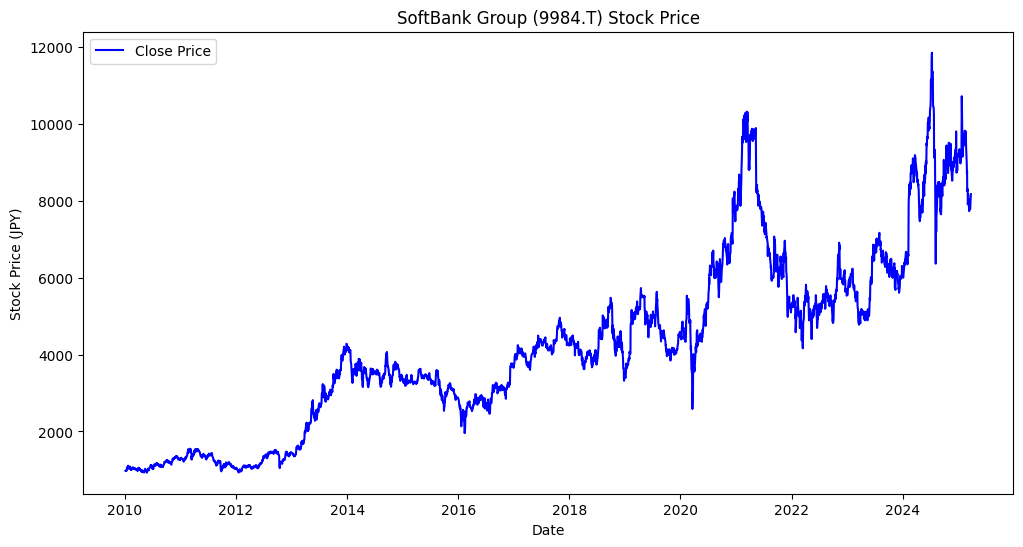

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"], label="Close Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Stock Price (JPY)")
plt.title("SoftBank Group (9984.T) Stock Price")
plt.legend()
plt.show()

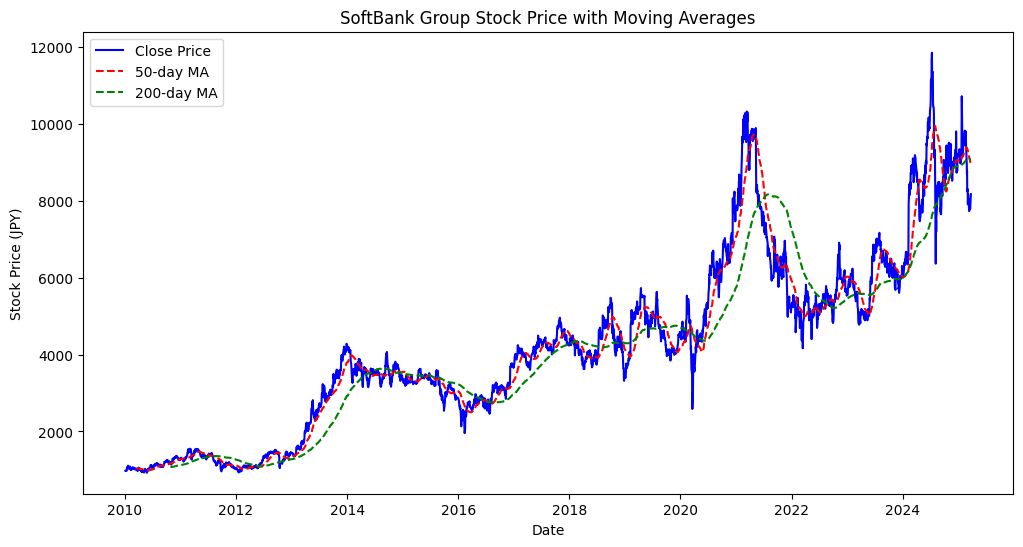

In [12]:
df["MA_50"] = df["Close"].rolling(window=50).mean() #50日移動平均を計算
df["MA_200"] = df["Close"].rolling(window=200).mean() #200日移動平均を計算

plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"], label="Close Price", color="blue")
plt.plot(df["Date"], df["MA_50"], label="50-day MA", color="red", linestyle="dashed")
plt.plot(df["Date"], df["MA_200"], label="200-day MA", color="green", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Stock Price (JPY)")
plt.title("SoftBank Group Stock Price with Moving Averages")
plt.legend()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df.head()

,Date,Close,High,Low,Open,Volume,MA_50,MA_200
0,2010-01-04,976.009460,978.700663,971.075589,973.318258,3383800,NaN,NaN
1,2010-01-05,977.803833,986.325977,975.112630,983.634773,6214800,NaN,NaN
2,2010-01-06,981.392090,986.774496,975.112616,977.803819,5451800,NaN,NaN
3,2010-01-07,984.980408,997.539356,978.700933,979.149467,6889600,NaN,NaN
4,2010-01-08,977.803833,995.745188,965.693419,985.877443,7708400,NaN,NaN


In [15]:
X = df[["Close", "MA_50", "MA_200"]].dropna()
X.shape

(3544, 3)

In [16]:
y = df["Close"].shift(-1).dropna()
X = df[["Close", "MA_50", "MA_200"]].iloc[:-1]  # 最後の行を削除して y と一致
X

,Close,MA_50,MA_200
0,976.009460,NaN,NaN
1,977.803833,NaN,NaN
2,981.392090,NaN,NaN
3,984.980408,NaN,NaN
4,977.803833,NaN,NaN
...,...,...,...
3737,7814.510254,9107.394570,9089.711936
3738,7957.117676,9084.856553,9087.855610
3739,7942.159180,9059.127314,9084.143818
3740,7785.589355,9031.642891,9080.718572


In [17]:
#データの 20% をテストデータ, 80% を訓練データ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2993, 3)
X_test shape: (749, 3)
y_train shape: (2993,)
y_test shape: (749,)


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [19]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [20]:
# 学習
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
# 予測
y_pred = model.predict(X_test)

In [22]:
# 評価（MAE: 平均絶対誤差）
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f} JPY")

Mean Absolute Error: 175.42 JPY


In [23]:
average_price = df["Close"].mean()
error_percentage = (mae / average_price) * 100
print(f"誤差率: {error_percentage:.2f}%")


誤差率: 4.16%


In [24]:
df["Daily Change"] = df["Close"] - df["Open"]  # 1日の値動き
df["High-Low"] = df["High"] - df["Low"]  # 1日の変動幅
df["Volatility"] = df["High-Low"] / df["Close"]  # 変動率
df["Returns"] = df["Close"].pct_change()  # 日次リターン
df["Volume Change"] = df["Volume"].pct_change()  # 出来高変化率
df["Momentum_14"] = df["Close"] - df["Close"].shift(14)  # 14日間のモメンタム

In [25]:
print(df[df["Volume Change"].isna()])

           Date        Close         High          Low         Open   Volume  \
0    2010-01-04   976.009460   978.700663   971.075589   973.318258  3383800   
1968 2018-01-02  4240.949707  4240.949707  4240.949707  4240.949707        0   
1969 2018-01-03  4240.949707  4240.949707  4240.949707  4240.949707        0   
2056 2018-05-04  4047.298584  4047.298584  4047.298584  4047.298584        0   

            MA_50       MA_200  Daily Change  High-Low  Volatility  Returns  \
0             NaN          NaN      2.691203  7.625074    0.007812      NaN   
1968  4524.827812  4271.544252      0.000000  0.000000    0.000000      0.0   
1969  4513.274541  4273.804194      0.000000  0.000000    0.000000      0.0   
2056  3946.972998  4264.070210      0.000000  0.000000    0.000000      0.0   

      Volume Change  Momentum_14  
0               NaN          NaN  
1968            NaN  -211.573730  
1969            NaN  -109.352051  
2056            NaN   235.020020  


In [26]:
# NaN を削除して `X` と `y` を揃える
df_fixed = df[[
    "Close", "MA_50", "MA_200", "Daily Change", "High-Low", "Volatility", "Returns", "Momentum_14"
]].dropna()

# 修正後の `X` と `y`
X = df_fixed.drop(columns=["Close"])
y = df_fixed["Close"].shift(-1).dropna()

# `X` を `y` に揃える
X = X.iloc[:len(y)]

# 確認
print(f"Fixed X shape: {X.shape}")
print(f"Fixed y shape: {y.shape}")


Fixed X shape: (3543, 7)
Fixed y shape: (3543,)


In [27]:
#データの 20% をテストデータ, 80% を訓練データ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2834, 7)
X_test shape: (709, 7)
y_train shape: (2834,)
y_test shape: (709,)


In [28]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [29]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [30]:
y_pred = model.predict(X_test)

In [31]:
# MAE の計算
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (RandomForest): {mae:.2f} JPY")

Mean Absolute Error (RandomForest): 705.79 JPY


In [32]:
average_price = df["Close"].mean()
error_percentage = (mae / average_price) * 100
print(f"誤差率: {error_percentage:.2f}%")

誤差率: 16.74%


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# ハイパーパラメータの最適化
param_grid = {
    "n_estimators": [100, 200, 500],  # 決定木の本数
    "max_depth": [5, 10, 20, None],   # 木の深さ
    "min_samples_split": [2, 5, 10],  # 分割の最小サンプル数
    "min_samples_leaf": [1, 2, 4]     # 葉ノードの最小サンプル数
}

rf = RandomForestRegressor(random_state=42)

# グリッドサーチで最適なパラメータを探す
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

# 最適なモデルで予測
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# 誤差を計算
mae = mean_absolute_error(y_test, y_pred)
print(f"Best RandomForest MAE: {mae:.2f} JPY")


Best RandomForest MAE: 704.70 JPY


In [34]:
average_price = df["Close"].mean()
error_percentage = (mae / average_price) * 100
print(f"誤差率: {error_percentage:.2f}%")

誤差率: 16.72%


In [35]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [36]:
# 特徴量作成
df["Daily Change"] = df["Close"] - df["Open"]
df["High-Low"] = df["High"] - df["Low"]
df["Volatility"] = df["High-Low"] / df["Close"]
df["Returns"] = df["Close"].pct_change()
df["Momentum_14"] = df["Close"] - df["Close"].shift(14)
df["MA_10"] = df["Close"].rolling(window=10).mean()
df["MA_50"] = df["Close"].rolling(window=50).mean()

# 特徴量と目的変数
X = df[["MA_10", "MA_50", "Daily Change", "High-Low", "Volatility", "Returns", "Momentum_14"]].dropna()
y = df["Close"].shift(-11)
y = y.loc[X.index]

# NaN を削除して同期
X = X.loc[y.notna()]
y = y.dropna()

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 線形回帰モデル
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 評価
mae = mean_absolute_error(y_test, y_pred)
avg_price = df["Close"].mean()
error_rate = (mae / avg_price) * 100

print(f"Mean Absolute Error: {mae:.2f} JPY")
print(f"誤差率: {error_rate:.2f}%")


Mean Absolute Error: 484.04 JPY
誤差率: 11.48%


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [38]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [39]:
df["Daily Change"] = df["Close"] - df["Open"]
df["High-Low"] = df["High"] - df["Low"]
df["Volatility"] = df["High-Low"] / df["Close"]
df["Returns"] = df["Close"].pct_change()
df["Momentum_14"] = df["Close"] - df["Close"].shift(14)
df["MA_10"] = df["Close"].rolling(window=10).mean()
df["MA_50"] = df["Close"].rolling(window=50).mean()

In [40]:
# 欠損を削除
features = ["MA_10", "MA_50", "Daily Change", "High-Low", "Volatility", "Returns", "Momentum_14"]
X = df[features]
y = df["Close"].shift(-1)
X

,MA_10,MA_50,Daily Change,High-Low,Volatility,Returns,Momentum_14
0,NaN,NaN,2.691203,7.625074,0.007812,NaN,NaN
1,NaN,NaN,-5.830940,11.213347,0.011468,0.001838,NaN
2,NaN,NaN,3.588271,11.661880,0.011883,0.003670,NaN
3,NaN,NaN,5.830940,18.838423,0.019126,0.003656,NaN
4,NaN,NaN,-8.073610,30.051769,0.030734,-0.007286,NaN
...,...,...,...,...,...,...,...
3738,7911.443408,9084.856553,-0.997258,92.744948,0.011656,0.018249,-1009.225098
3739,7914.634668,9059.127314,-140.613315,182.498133,0.022978,-0.001880,-771.876953
3740,7895.686768,9031.642891,-76.788828,111.692841,0.014346,-0.019714,-998.255371
3741,7873.148730,9006.232773,58.838194,139.616054,0.017588,0.019598,-312.141602


In [41]:
df["MA_10"] = df["Close"].rolling(window=10).mean()
df["MA_50"] = df["Close"].rolling(window=50).mean()
df["Returns"] = df["Close"].pct_change()
df["Momentum_14"] = df["Close"] - df["Close"].shift(14)

print(df[["MA_10", "MA_50", "Returns", "Momentum_14"]].isna().sum())


MA_10           9
MA_50          49
Returns         1
Momentum_14    14
dtype: int64


# LSTM
Step 1：特徴量と目的変数を分ける

Step 2：スケーリング（正規化）

Step 3：時系列データに変形（LSTMの場合）

Step 4：訓練・テストデータに分割

Step 5：モデルの構築・学習・評価

In [42]:
import yfinance as yf

# ソフトバンクグループ（東証：9984）
df = yf.download("9984.T", start="2010-01-01", end="2025-03-25")

# 調整後終値（株式分割や配当を反映）
df = df.rename(columns={"Adj Close": "Close"})

df.tail()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,9984.T,9984.T,9984.T,9984.T,9984.T
Date,,,,,
2025-03-17,7957.117676,8032.909247,7940.164298,7958.114933,5880500
2025-03-18,7942.159180,8110.695707,7928.197574,8082.772495,6263800
2025-03-19,7785.589355,7897.282196,7785.589355,7862.378183,6232700
2025-03-21,7938.169922,8017.950524,7878.334470,7879.331728,7281000
2025-03-24,8176.514648,8202.443345,8021.939728,8027.923274,7957500


In [43]:
# 列の階層（MultiIndex）をフラットにする
df.columns = df.columns.droplevel(1)  # 「Price」などの上位層を消す
df.columns.name = None                # 列名の名前もリセット
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [44]:
df["Daily Change"] = df["Close"] - df["Open"]
df["High-Low"] = df["High"] - df["Low"]
df["Volatility"] = df["High-Low"] / df["Close"]
df["Returns"] = df["Close"].pct_change()
df["Momentum_14"] = df["Close"] - df["Close"].shift(14)
df["MA_10"] = df["Close"].rolling(window=10).mean()
df["MA_50"] = df["Close"].rolling(window=50).mean()

In [45]:
# 特徴量に使うカラム
features = ["MA_10", "MA_50", "Daily Change", "High-Low", "Volatility", "Returns", "Momentum_14"]
X = df[features]
X

,MA_10,MA_50,Daily Change,High-Low,Volatility,Returns,Momentum_14
Date,,,,,,,
2010-01-04,NaN,NaN,2.691203,7.625074,0.007812,NaN,NaN
2010-01-05,NaN,NaN,-5.830940,11.213347,0.011468,0.001838,NaN
2010-01-06,NaN,NaN,3.588271,11.661880,0.011883,0.003670,NaN
2010-01-07,NaN,NaN,5.830940,18.838423,0.019126,0.003656,NaN
2010-01-08,NaN,NaN,-8.073610,30.051769,0.030734,-0.007286,NaN
...,...,...,...,...,...,...,...
2025-03-17,7911.443408,9084.856553,-0.997258,92.744948,0.011656,0.018249,-1009.225098
2025-03-18,7914.634668,9059.127314,-140.613315,182.498133,0.022978,-0.001880,-771.876953
2025-03-19,7895.686768,9031.642891,-76.788828,111.692841,0.014346,-0.019714,-998.255371


In [46]:
# 目的変数（翌日の終値）
y = df["Close"].shift(-1)
y

,Close
Date,
2010-01-04,977.803833
2010-01-05,981.392090
2010-01-06,984.980408
2010-01-07,977.803833
2010-01-08,980.943481
...,...
2025-03-17,7942.159180
2025-03-18,7785.589355
2025-03-19,7938.169922


In [47]:
# 特徴量と目的変数を結合して、NaNを一括で除去
data = pd.concat([X, y.rename("Target")], axis=1).dropna()

# 整形後のXとy
X = data[features].values
y = data["Target"].values

LSTMは数値のスケールに敏感なので、0〜1の範囲にしておくのがベストらしい…

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y.reshape(-1, 1))


In [50]:
sequence_length = 5
X_seq, y_seq = [], []
for i in range(sequence_length, len(X_scaled)):
    X_seq.append(X_scaled[i-sequence_length:i])
    y_seq.append(y_scaled[i])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

In [51]:
# Step 6: 学習・テスト分割
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

In [52]:
# Step 7: LSTMモデル構築と学習
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Step 8: 予測と逆スケーリング
y_pred = model.predict(X_test)
y_pred_inverse = y_scaler.inverse_transform(y_pred).flatten()
y_test_inverse = y_scaler.inverse_transform(y_test).flatten()

In [ ]:
# Step 9: 誤差評価とプロット
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
print(f"Mean Absolute Error: {mae:.2f} JPY")

plt.figure(figsize=(10, 5))
plt.plot(y_test_inverse, label="Actual")
plt.plot(y_pred_inverse, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Stock Prices")
plt.show()

In [ ]:
# 予測結果（y_pred_inverse）と実際の株価（y_test_inverse）がある前提

# 平均株価
average_price = y_test_inverse.mean()

# MAE（絶対誤差の平均）
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)

# 誤差率（％）
error_rate = (mae / average_price) * 100

print(f"平均株価: {average_price:.2f} JPY")
print(f"Mean Absolute Error: {mae:.2f} JPY")
print(f"誤差率: {error_rate:.2f}%")

# 「上がる or 下がる」分類

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
#  株価データを取得
df = yf.download("9984.T", start="2015-01-01", end="2025-03-25")
df = df.rename(columns={"Adj Close": "Close"})

In [ ]:
# 特徴量を作成
df["Daily Change"] = df["Close"] - df["Open"]
df["High-Low"] = df["High"] - df["Low"]
df["Volatility"] = df["High-Low"] / df["Close"]
df["Returns"] = df["Close"].pct_change()
df["Momentum_14"] = df["Close"] - df["Close"].shift(14)
df["MA_10"] = df["Close"].rolling(window=10).mean()
df["MA_50"] = df["Close"].rolling(window=50).mean()

In [ ]:
# ターゲット列作成（翌日株価が上がるなら1、下がるなら0）
df["Target"] = (df["Close"].shift(-1) > df["Close"]).astype(int)

In [ ]:
# 欠損値を除外
features = ["MA_10", "MA_50", "Daily Change", "High-Low", "Volatility", "Returns", "Momentum_14"]
data = df[features + ["Target"]].dropna()

X = data[features]
y = data["Target"]

In [ ]:
# 訓練・テストに分割（80:20）
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [ ]:
# モデル学習（ランダムフォレスト）
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

In [ ]:
# 予測と評価
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
# 可視化
plt.figure(figsize=(10, 4))
plt.plot(y_test.reset_index(drop=True), label="Actual", alpha=0.6)
plt.plot(y_pred, label="Predicted", alpha=0.6)
plt.title("Actual vs Predicted (Up = 1, Down = 0)")
plt.legend()
plt.show()